## 0 | Import packages

In [2]:
import os
import h5py
import numpy as np
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
from utilities import importFile, openFile, openHDF5file, getLooseRseal
from tkinter.filedialog import askopenfilename, askopenfilenames
from collections import defaultdict
from nptdms import TdmsFile
print("done!")

done!


## 1 | Open an .hdf5 file and extract channels

In [3]:
# Load data
channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [4]:
# Inspect data frame
channels_data_frame

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."
Output A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Output B,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


To check how to navigate pandas dataframes go to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.flags.html or check testpulse_Rseal notebook. Some commands in the following cell.


In [5]:
# pandas.DataFrame.at - Access a single value for a row/column label pair.
print(channels_data_frame.at['Channel A', '7'])
print(channels_data_frame.iat[0,0])

# pandas.DataFrame.columns - The column labels of the DataFrame.
print(channels_data_frame.columns)

# pandas.DataFrame.index - The index (row labels) of the DataFrame.
print(channels_data_frame.index)

# pandas.DataFrame.shape - Return a tuple representing the dimensionality of the DataFrame.
print(channels_data_frame.shape)

# pandas.DataFrame.loc - Access a group of rows and columns by label(s) or a boolean array.
print(channels_data_frame.loc[['Channel A', 'Channel B'],:])
print(channels_data_frame.loc[['Channel A'], :])

# pandas.DataFrame.iloc - Purely integer-location based indexing for selection by position.
print(channels_data_frame.iloc[0, :])

[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]
[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]
Index(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24'],
      dtype='object')
Index(['Channel A', 'Channel B', 'Output A', 'Output B'], dtype='object')
(4, 18)
                                                           7  \
Channel A  [-1.6124128324134814, -1.2260207615682315, -1....   
Channel B  [-11.616220826606902, -7.752300066135383, -8.7...   

                                                           8  \
Channel A  [-1.5480141542486916, -1.4192167975478727, -1....   
Channel B  [9.635343909020817, 5.771422947326991, 11.8892...   

                                                           9  \
Channel A  [-1.7412101883719264, -1.4836154759601623, -1....   
Channel B  [0.29753499493087243, -0.6684452226398963, 1.9...   

                                       

## 2 | Find Test Pulse indices so you can ignore it from analysis

__Protocols used:__

 - OP_VC_clear:
    - Sweep duration: 4950ms
    - Sweep interval: 50ms
    - Test pulse: 100ms (50ms delay and 50ms pulse)
    - Real data per sweep: 4850ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 5100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 5025ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 10100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 10025ms

### 2.1 | Load one sweep from Output A and get the test_pulse indices

In [6]:
sweep_IA = np.array(channels_data_frame.at['Channel A', '7'])
sweep_IB = np.array(channels_data_frame.at['Channel B', '7'])
sweep_OA = np.array(channels_data_frame.at['Output A', '7'])
print('done')

done


In [7]:
test_pulse = np.where(sweep_OA < 0)
test_pulse_OA_indices = test_pulse[0]
print(test_pulse_OA_indices)

[ 625  626  627 ... 1871 1872 1873]


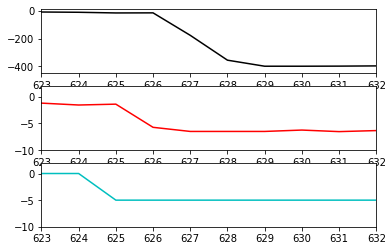

In [17]:
# To plot inline
%matplotlib inline

# Note how there is a further delay for the channel B
plt.figure(1)
plt.subplot(311)
plt.plot(sweep_IB, 'k')
plt.axis([test_pulse_OA_indices[0]-2, test_pulse_OA_indices[7], -450, 10])
plt.subplot(312)
plt.plot(sweep_IA, 'r')
plt.axis([test_pulse_OA_indices[0]-2, test_pulse_OA_indices[7], -10, 2])
plt.subplot(313)
plt.plot(sweep_OA, 'c')
plt.axis([test_pulse_OA_indices[0]-2, test_pulse_OA_indices[7], -10, 2])
plt.show()

In [12]:
# To plot in an adjustable pop up window
%matplotlib tk

# Note how there is a further delay for the channel B
plt.figure(2)
plt.subplot(311)
plt.plot(sweep_IB, 'k')
plt.axis([test_pulse_OA_indices[-2], test_pulse_OA_indices[-1]+8, -450, 20])
plt.subplot(312)
plt.plot(sweep_IA, 'r')
plt.axis([test_pulse_OA_indices[-2], test_pulse_OA_indices[-1]+8, -10, 2])
plt.subplot(313)
plt.plot(sweep_OA, 'c')
plt.axis([test_pulse_OA_indices[-2], test_pulse_OA_indices[-1]+8, -10, 2])
plt.show()

### 2.2 | Get test_pulse indices to remove the epochs where voltage is injected from analysis

In [ ]:
test_pulse_IB_start = test_pulse_OA_indices[0] + 1 # 
print(test_pulse_IB_start)
test_pulse_IB_end = test_pulse_OA_indices[-1] + 1 + 4
print(test_pulse_IB_end)

## 3 | Find spikes

In [18]:
# Note how there is a further delay for the channel B
plt.figure(1)
plt.plot(sweep_IB, 'k')
#plt.xlim(left=test_pulse_IB_end)
plt.show()

In [ ]:
plt.figure(1)
plt.plot(np.diff(sweep_IB), 'k')
plt.xlim(left=test_pulse_IB_end)
plt.show()

In [ ]:
comp = lambda a, b: a < b
comp(2, 2)

In [ ]:
indices = np.arange(test_pulse_IB_start, test_pulse_IB_end)
sweep_IB_no_testpulse = np.delete(sweep_IB, indices)
sweep_IB_no_testpulse

In [ ]:
np.where(sweep_IB_no_testpulse < (-50))

In [ ]:
test_pulse_OA_indices

In [ ]:
plt.figure(1)
plt.plot(sweep_IB_no_testpulse, 'k')
plt.axis([(5761-200), (5761+200), -100, 50])
plt.show()

In [ ]:
from scipy.signal import find_peaks
help(find_peaks)

In [ ]:
peaks, properties = find_peaks(-sweep_IB_no_testpulse, height = None, distance = 5, prominence = 50, width = 2)
print(len(peaks))
peaks

In [ ]:
properties['prominences']

In [ ]:
plt.plot(peaks, sweep_IB_no_testpulse[peaks], "xr"); plt.plot(sweep_IB_no_testpulse); plt.legend(['peaks'])
plt.show()

### Loop over sweeps to first delete all test_pulses and then concatenate the rest

In [ ]:
# Load data
channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

In [ ]:
for sweep in channels_data_frame.columns:
    sweep_IB = np.array(channels_data_frame.at['Channel B', sweep])
    sweep_OA = np.array(channels_data_frame.at['Output A', sweep])

    test_pulse = np.where(sweep_OA < 0)
    test_pulse_OA_indices = test_pulse[0]
    test_pulse_IB_end = test_pulse_OA_indices[-1] + 1 + 4

    sweep_IB_no_testpulse = sweep_IB[test_pulse_IB_end:]

    peaks, properties = find_peaks(-sweep_IB_no_testpulse,
                                   height = None,
                                   threshold = None,
                                   distance = 5,
                                   prominence = 50,
                                   width = 2,
                                   wlen = None,
                                   rel_height = None,
                                   plateau_size = None)
                                   






In [ ]:
print(len(sweep_IB))
print(len(sweep_IB[test_pulse_IB_end:]))

In [ ]:
plt.plot(sweep_IB[test_pulse_IB_end:])
plt.show()

In [ ]:
c = np.array(channels_data_frame.loc['Channel B', :])
d = np.concatenate(c)
plt.plot(d, 'r')
#plt.axis([0, len(d), -200, 200])
plt.show()

In [ ]:
peaks, properties = find_peaks(-sweep_IB_no_testpulse, height = None, distance = 5, prominence = 50, width = 2)
peaks

In [ ]:
plt.plot(peaks, sweep_IB_no_testpulse[peaks], "xr"); plt.plot(sweep_IB_no_testpulse); plt.legend(['peaks'])
plt.show()

# Types of firing rate to assess

 * Instantaneous firing rate: inverse of the interspike interval

 * Firing rate over full recording

 * Firing rate over time windows (1s?)